# Data Mining - Practical04
<b>NB: Experiment code and conclusion report are included.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

## Part A: K-means Clustering

1. As instructed in Practical 02-B, drop any duplicate records, discard all rows with null values in Description and CustomerID, remove all records with InvoiceNo starting with ‘C’, remove records with Description ‘POSTAGE’, remove records with negative or zero Quantity and UnitPrice. Select records only related to ‘United Kingdom’. How many different customers do you have?

In [2]:
#Load the data ('OR' stands for Online Retail)
df_OR = pd.read_excel("Online_Retail.xlsx")

In [3]:
#Drop duplicates
df_OR = df_OR.drop_duplicates()

#Discard all rows with null values in Description and CustomerID.
df_OR=df_OR.dropna(subset=['Description','CustomerID'])

#Remove all records with InvoiceNo starting with ‘C’.
df_OR=df_OR.drop(index=df_OR.loc[df_OR["InvoiceNo"].str.startswith('C')==True].index)

#Remove records with Description ‘POSTAGE‘；
df_OR = df_OR.drop(df_OR.loc[df_OR['Description']=='POSTAGE'].index)

#Remove records with negative or zero Quantity and UnitPrice
df_OR = df_OR.drop(df_OR.loc[df_OR['Quantity']<=0].index)
df_OR = df_OR.drop(df_OR.loc[df_OR['UnitPrice']<=0].index)

In [4]:
#Select records only related to ‘United Kingdom’.
df_UK = df_OR.loc[df_OR['Country'] == 'United Kingdom']
df_UK

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [5]:
#Check how many customer we have.
print('The number of different customers we have in the dataset is', len(df_UK["CustomerID"].unique()))

The number of different customers we have in the dataset is 3920


2. Derive three new features for each customer as follows: (a) Monetary: total money spent by a customer, (b) Frequency: number of purchases (take a number of invoices per customer), and (c) Recency: days since the last purchase (take the date of analysis as 09-12-2011). Remove outliers for the three new features.

In [6]:
#Create df_new to derive these three new features.
df_new = pd.DataFrame(df_UK["CustomerID"].unique(), columns=["CustomerID"])
df_new["Monetary"] = np.nan
df_new["Frequency"] = np.nan
df_new["Recency"] = np.nan
df_new

,CustomerID,Monetary,Frequency,Recency
0,17850.0,NaN,NaN,NaN
1,13047.0,NaN,NaN,NaN
2,13748.0,NaN,NaN,NaN
3,15100.0,NaN,NaN,NaN
4,15291.0,NaN,NaN,NaN
...,...,...,...,...
3915,15471.0,NaN,NaN,NaN
3916,13436.0,NaN,NaN,NaN
3917,15520.0,NaN,NaN,NaN
3918,13298.0,NaN,NaN,NaN


In [7]:
#Create Monetary column
#Here we will create 'Sum' column to calculate the total amount of each transaction in the dataset.
df_UK['Sum'] = df_UK['Quantity'] * df_UK['UnitPrice']

#Create customerID list
customerID_list = df_UK["CustomerID"].unique().tolist()

#We will calculate the sum of the total amount of transactions for every different customerID; and we will add to the 'Monetary' correspondingly.
for i in customerID_list:
    monetary = df_UK['Sum'].loc[df_UK['CustomerID']==i].sum()
    df_new['Monetary'].loc[(df_new['CustomerID']==i)] = monetary
    
    frequency = df_UK.loc[df_UK['CustomerID']==i].shape[0]
    df_new['Frequency'].loc[df_new['CustomerID']==i] = frequency
    
    recency = (dt.strptime('2011-12-09', "%Y-%m-%d") - dt.strptime(str(df_UK["InvoiceDate"].loc[df_UK['CustomerID']==i].max())[0:10],"%Y-%m-%d")).days
    df_new['Recency'].loc[df_new['CustomerID']==i] = recency

#Delete the 'Sum' column as we donnot need it.
df_UK = df_UK.drop(columns = ['Sum'])

<ipython-input-7-6831910ee498>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UK['Sum'] = df_UK['Quantity'] * df_UK['UnitPrice']


In [8]:
#Remove outliers for the three new features

df_new.reset_index(drop=True, inplace=True)

for i in ["Monetary","Frequency","Recency"]:

    Q1 = np.percentile(df_new[i], 25, interpolation = 'midpoint')
 
    Q3 = np.percentile(df_new[i], 75, interpolation = 'midpoint')
    
    IQR = Q3 - Q1

    # Upper bound
    upper = np.where(df_new[i] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df_new[i] <= (Q1-1.5*IQR))

    #Drop the outliers
    df_new.drop(index=upper[0], inplace = True)
    df_new.drop(index=lower[0], inplace = True)
    
    df_new.reset_index(drop=True, inplace=True)

In [9]:
df_new

,CustomerID,Monetary,Frequency,Recency
0,13047.0,3237.54,172.0,31.0
1,13748.0,948.25,28.0,95.0
2,15100.0,876.00,3.0,333.0
3,16098.0,2005.63,67.0,87.0
4,18074.0,489.60,13.0,373.0
...,...,...,...,...
3304,15471.0,454.48,73.0,2.0
3305,13436.0,196.89,12.0,1.0
3306,15520.0,343.50,18.0,1.0
3307,13298.0,360.00,2.0,1.0


3. Transform Monetary, Frequency and Recency to near-normal form using loge (x+1) formula. Using three transformed attributes, apply the K-means algorithm to cluster the dataset into x (from 1 to 10) number of clusters. Plot distortion score (within-cluster sum of square errors) against the number of clusters. What is the distortion score for 3 clusters?

In [10]:
#Transformation of Monetary, Frequency and Recency
df_backup = df_new.copy()
df_new['Monetary']=np.log(df_new['Monetary']+1)
df_new['Frequency']=np.log(df_new['Frequency']+1)
df_new['Recency']=np.log(df_new['Recency']+1)

In [11]:
df_new

,CustomerID,Monetary,Frequency,Recency
0,13047.0,8.082878,5.153292,3.465736
1,13748.0,6.855672,3.367296,4.564348
2,15100.0,6.776507,1.386294,5.811141
3,16098.0,7.604212,4.219508,4.477337
4,18074.0,6.195629,2.639057,5.924256
...,...,...,...,...
3304,15471.0,6.121352,4.304065,1.098612
3305,13436.0,5.287711,2.564949,0.693147
3306,15520.0,5.842094,2.944439,0.693147
3307,13298.0,5.888878,1.098612,0.693147


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [13]:
X = pd.DataFrame(df_new[['Monetary','Frequency','Recency']])

In [14]:
distortion_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    distortion = kmeans.inertia_
    distortion_list.append(distortion)

In [15]:
distortion_list

[12028.76989351285,
 6812.970832956798,
 5253.89666831504,
 4245.086727060469,
 3563.485474627611,
 3190.860420181324,
 2877.12039342458,
 2640.5326069676958,
 2438.8346305160894,
 2266.9444741970347]

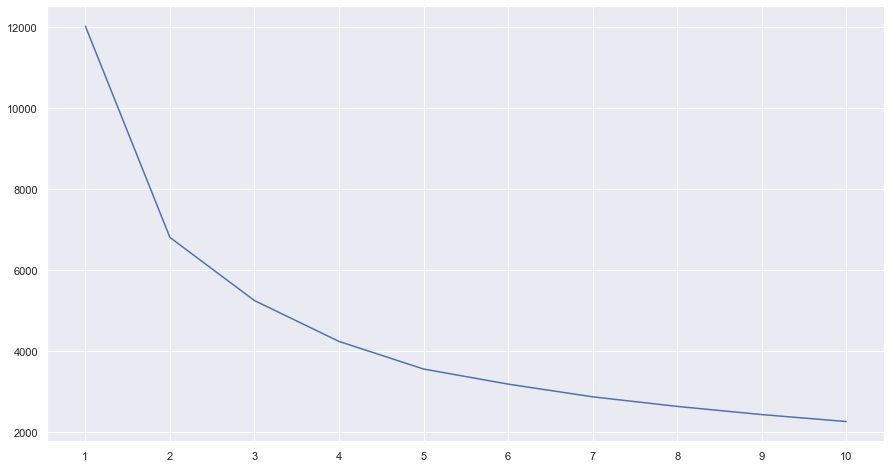

In [16]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(x=list(range(1,11)), y=distortion_list)
ax.set(xticks=list(range(1,11)))
plt.show()

The distortion socre is 5254.133991414254 when the cluster is 3.

4. Plots scatter diagrams for Monetary vs Frequency, Monetary vs Recency and Frequency vs Recency with 3 clusters. Make sure that 3 clusters are shown with different colours and centroids are marked differently. Name 3 clusters appropriately (in the legends of the scatter diagrams) in terms of customer behaviours.

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

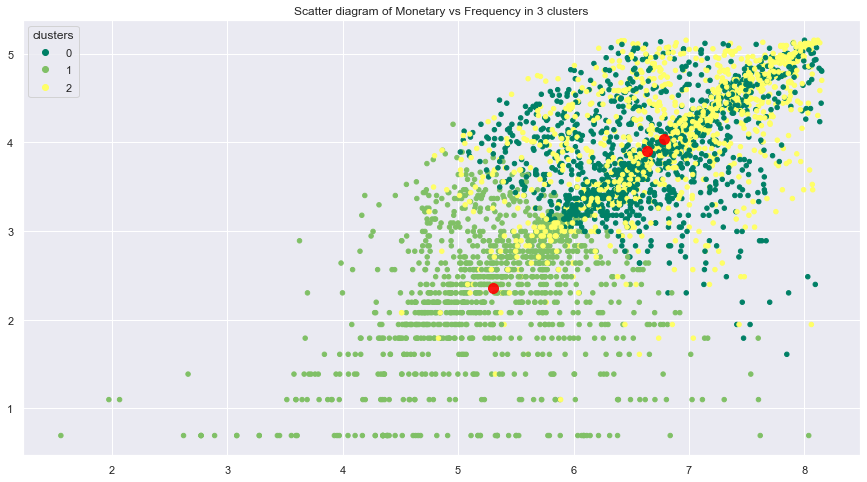

In [21]:
#Scatter plot Monetary vs Frequency
fig,ax = plt.subplots()
sc = ax.scatter(X["Monetary"], X["Frequency"], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9);
ax.legend(*sc.legend_elements(), title='clusters')
plt.title("Scatter diagram of Monetary vs Frequency in 3 clusters")
plt.show()

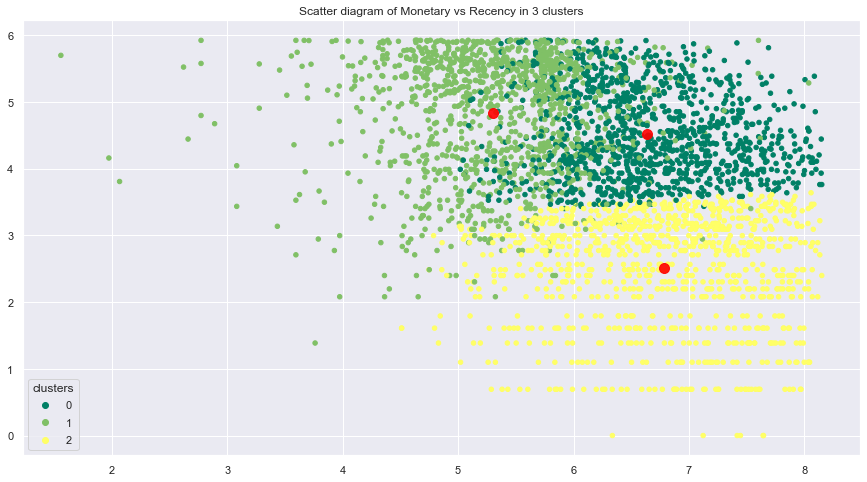

In [22]:
#Scatter plot Monetary vs Recency
fig,ax = plt.subplots()
sc = ax.scatter(X["Monetary"], X["Recency"], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='red', s=100, alpha=0.9);
ax.legend(*sc.legend_elements(), title='clusters')
plt.title("Scatter diagram of Monetary vs Recency in 3 clusters")
plt.show()

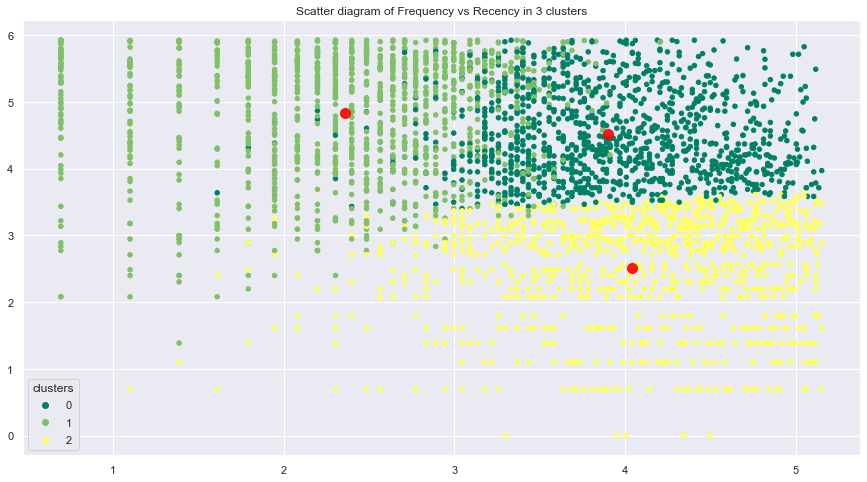

In [23]:
#Scatter plot Frequency vs Recency
fig,ax = plt.subplots()
sc = ax.scatter(X["Frequency"], X["Recency"], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=100, alpha=0.9);
ax.legend(*sc.legend_elements(), title='clusters')
plt.title("Scatter diagram of Frequency vs Recency in 3 clusters")
plt.show()